In [1]:
# Standard Data Science Utility Belt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# User defined methods
#from wrangle import wrangle, wrangle_explore
from acquire import acquire
from prepare import prepare
import explore
import model
import env
#from functions import get_data_dictionary

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene
import scipy.stats as stats

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.reset_option("display.max_rows", "display.max_columns")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

        Our goal for this project was to predict the winner of a professional League of Legends match at the halfway point.

### Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'Towers lost'.

### Domain Knowledge Quick Tip


    League of Legends is a multiplayer online battle arena (MOBA) game in which the player controls a character ("champion") with a set of unique abilities from an isometric perspective.  As of April 2021, there are 155 champions available to play. Over the course of a match, champions gain levels by accruing experience points (XP) through killing enemies. Items also increase champions' strength, and are bought with gold, which players accrue passively over time and earn actively by defeating the opposing team's minions, champions, or defensive structures. In the main game mode, Summoner's Rift, items are purchased through a shop menu available to players only when their champion is in the team's base. Each match is discrete; levels and items do not transfer from one match to another.

### The Plan

    Setup the environment, create a new repository, update the .gitignore, create a README.md with the data and common termonology dictionaries, create a trello board, come up with an original hypothesis and setup a morning standup living document.
    
    Acquire the data using the riot API.
    
    Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide what do with null values, and encode the features.
    
    Split the Data, into three data sets named train and test.
    
    Explore the data, look through the graphs and evaluate each feature to find drivers of predicting win rates.  Exploration will also include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and documentation of the findings and takeaways.
    
    Create Models, create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier, RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest validate accuracy to run on my final test data.
    
    Wrap it up, document conclusions, recommendations, and take aways in the final report notebook.  Create a presentation. 

# Executive Summary - Conclusions & Next Steps

### Conclusion

    Our model can predict the winner of a match with an accuracy of 61% beating our baseline of 52%. While this does beat our baseline, we believe this also speaks to the overall balance of the game! Having balanced game mechanics means that it is accessible to new and seasoned players alike. If we were able to predict with a much higher accuracy. Then that would mean there are some alarming imbalances that need attention. Ultimately from our model, we can conclude some of the top features that teams should focus on if they want that competitive edge.
    
    Our model confirmed that our original hypothesis of 'TeamWards' being the biggest driver of win rates was incorrect.  Our models feature importance concluded that 'towers_lost' was the biggest driver in predicting win rates. 
    
    Our model identified the most important features as:
        
        - BlueTeamTotalGoldDifference
        - BlueTeamXpDifference
        - BlueTeamTotalDmgDifference
        - BlueTeamTotalMinionsMonstersDifference
        - BlueTeamKdaDifference
        
    If we had more time we would have liked to:

        - run our model on non-pro games & see if our most important features are still the biggest drivers for predicting win rates
        - dive deeper into each of the most important features to see how they are all connected
        - engineer more features
        - predict a winner a different times to find out at what time can you predict a games outcome with a much higher accuracy 
        

### Recommendations

    The data suggests:  
    
    - If you are a coach, revolving your team stragety around the most important features can lead to more wins. 
    
    - If you are player, encouraging memebers of ones team to work around the most important features can lead to more wins. 

### Key Takeaways

    We used event data from the Riot API to calcuate what the value of each oberservation was at the 10 min marker.
    
    The only game types that were used were ranked matches, these included:
    
        - Flex
        - Solo/Duo
        - Clash

    Games were pulled from only one game version:

        '11.23.409.111'

# Data Acquisition (Jared)

In [2]:
df = pd.read_csv('final_10.csv')

In [3]:
### .info(), .head(), .describe()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 197 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    Unnamed: 0                        int64  
 1    airdragon_team100                 float64
 2    assistsplayer_1                   float64
 3    assistsplayer_10                  float64
 4    assistsplayer_2                   float64
 5    assistsplayer_3                   float64
 6    assistsplayer_4                   float64
 7    assistsplayer_5                   float64
 8    assistsplayer_6                   float64
 9    assistsplayer_7                   float64
 10   assistsplayer_8                   float64
 11   assistsplayer_9                   float64
 12   baron_team100                     float64
 13   chemtechdragon_team100            float64
 14   currentGold_1                     float64
 15   currentGold_10                    float64
 16   currentGold_2         

In [4]:
df.head()

,Unnamed: 0,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_0,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,876.0,1331.0,556.0,629.0,437.0,400.0,625.0,102.0,1331.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1752,1637449991725,4110664149,CLASSIC,teambuilder-match-4110664149,1637448239216,MATCHED_GAME,11.23.409.111,0.0,30.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4863.0,2431.000000,1403.971510,0.0,1215.5,2431.0,3646.5,4862.0
airdragon_team100,4863.0,0.058811,0.235296,0.0,0.0,0.0,0.0,1.0
assistsplayer_1,4863.0,0.798684,1.074164,0.0,0.0,0.0,1.0,9.0
assistsplayer_10,4863.0,2.192885,1.798182,0.0,1.0,2.0,3.0,11.0
assistsplayer_2,4863.0,1.461855,1.335885,0.0,0.0,1.0,2.0,8.0
...,...,...,...,...,...,...,...,...
xp_9,4863.0,3205.961958,574.367237,0.0,2838.0,3123.0,3454.0,5818.0
chemtechdragon_team200,291.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
riftherald_team200,504.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
airdragon_team200,299.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Distribution - "Team Data Stats"

In [6]:
# We will only be graphing a distribution for a single player, player 10
    
# These features are:
player_10_stats = [
    'assistsplayer_10',
    'killsplayer_10',
    'deathsplayer_10',
    'ward_player_10',
    'goldPerSecond_10',
    'totalGold_10',
    'xp_10',
    'trueDamageDoneToChampions_10',
    'totalGold_10',
    'totalDamageDoneToChampions_10',
    'timeEnemySpentControlled_10',
    'physicalDamageDoneToChampions_10',
    'minionsKilled_10',
    'magicDamageDoneToChampions_10',
    'level_10']

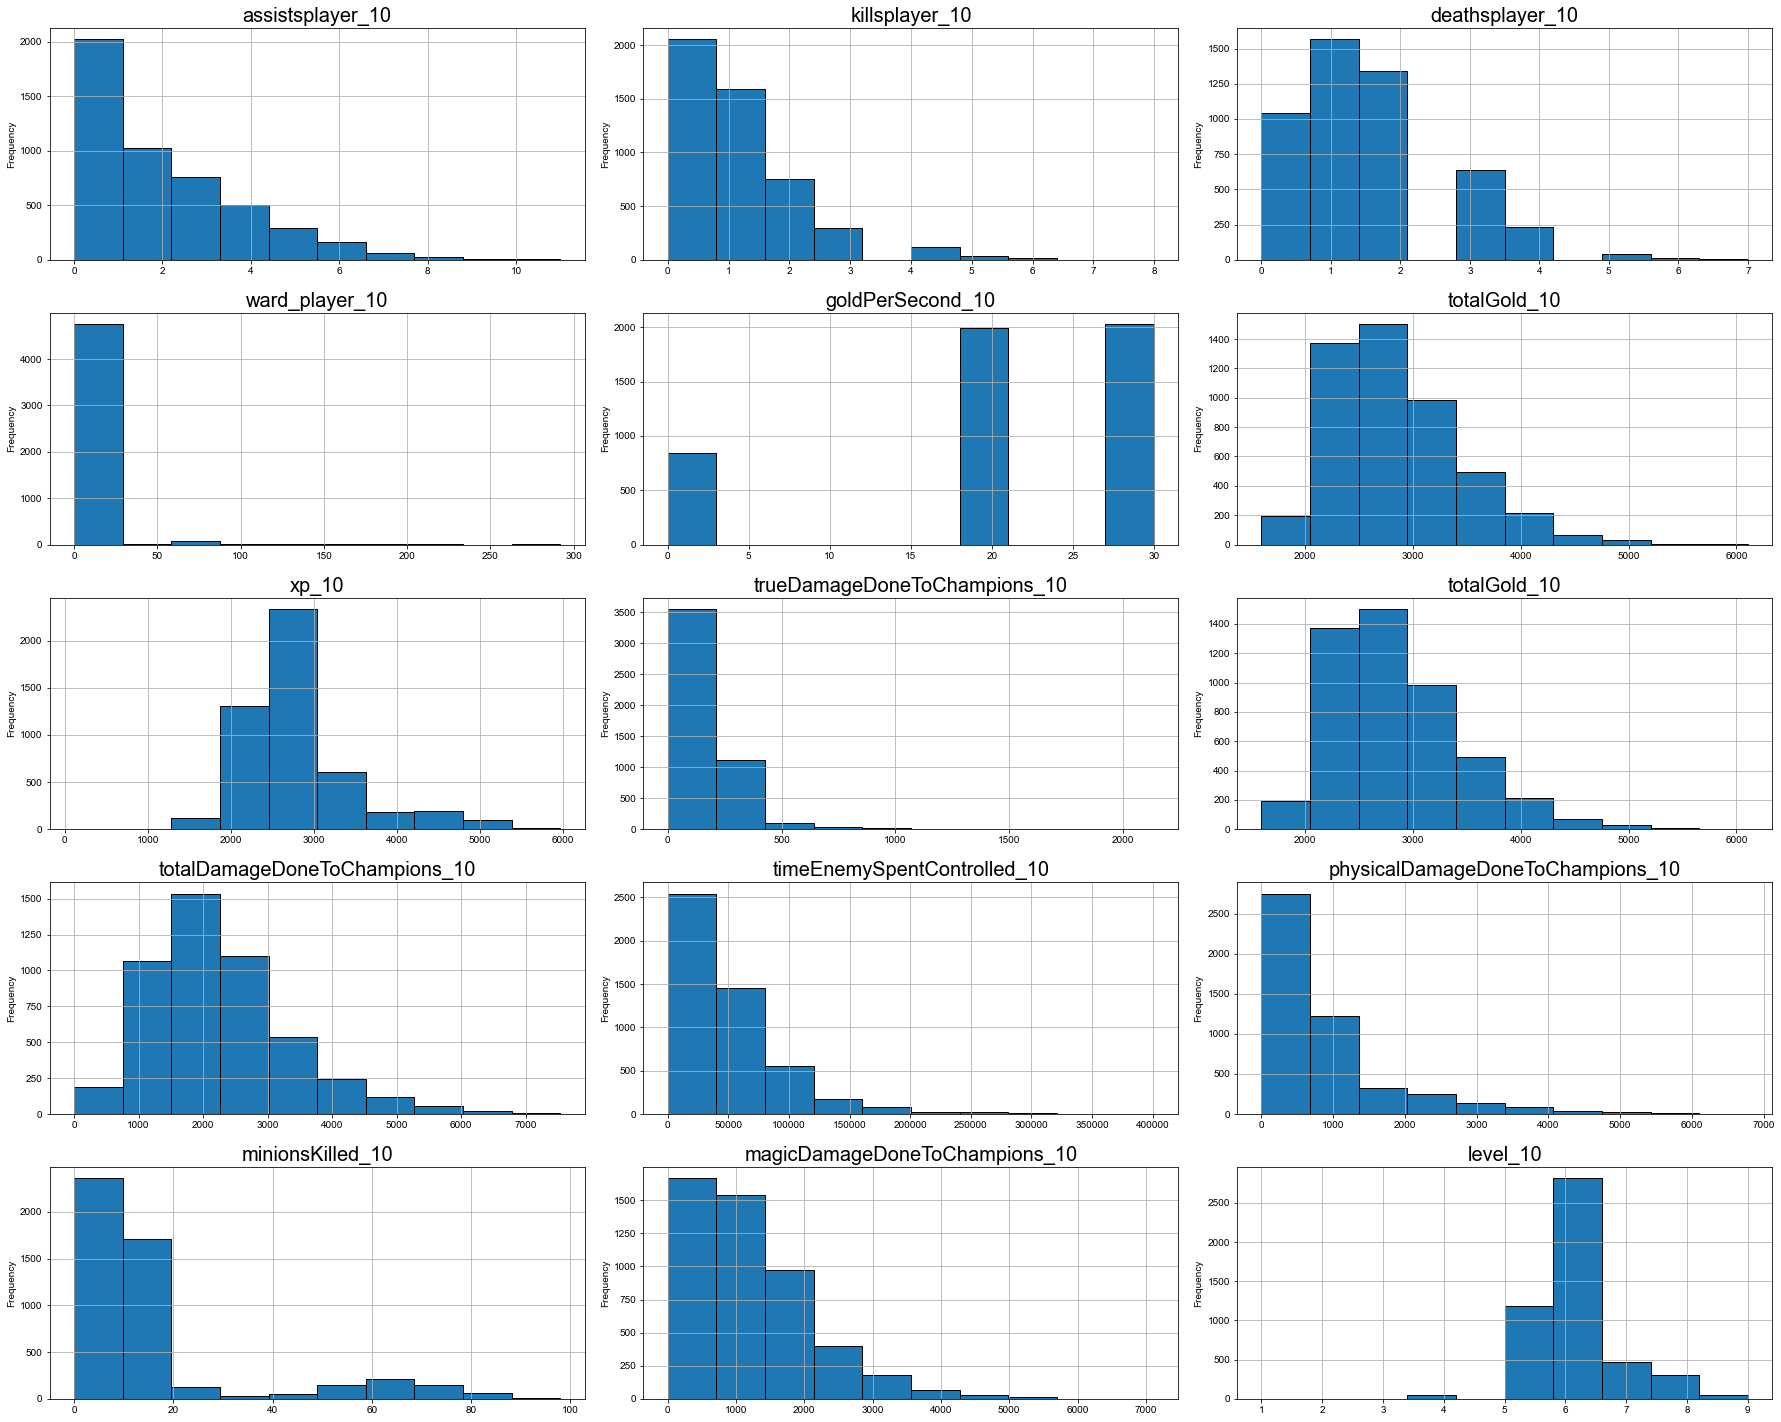

In [7]:
# Data Distributions for player 10
fig, axs = plt.subplots(5,3, sharey = False, figsize = (25,20))
axe = axs.ravel()
sns.set(font_scale = 1.25)
for i,col in enumerate(player_10_stats):
    p = df[col].plot.hist(ax = axe[i],title = col, ec = 'black',bins = 10)
    p.set_title(col,fontsize = 20)
    plt.tight_layout()

### Data Dictionary
| Feature                    | Datatype                | Definition   |
|:----------------------|:------------------------|:-------------|
| RedTeamKills|int64|Gives a total of the red teams kills.|
| BlueTeamKills|int64|Gives a total of the blue teams kills|
| RedTeamTowerKills|int64|Gives a total of the number of towers taken by the red team|
| BlueTeamTowerKills|int64|Gives a total of the number of towers taken by the blue team|
| RedTeamTowerAssists|int64|Gives the total number of assists on the red team|
| BlueTeamTowerAssists|int64|Gives the total number of assists on the blue team|
| RedTeamAvgLvl|int64|Takes the mean level of all the players on the red team|
| BlueTeamAvgLvl|int64|Takes the mean level of all the players on the blue team|
| RedTeamGoldSpent|int64|Gives a total amount of gold spent by the red team|
| BlueTeamGoldSpent|int64|Gives a total amount of gold spent by the blue team|
| RedTeamDragons|int64|Gives a total number of dragons killed by the red team|
| BlueTeamDragons|int64|Gives a total number of dragons killed by the blue team|
| RedTeamHeralds|int64|Gives a total number of heralds killed by the red team|
| BlueTeamHeralds|int64|Gives a total number of heralds killed by the blue team|
| RedTeamBarons|int64|Gives a total number of barons killed by the red team|
| BlueTeamBarons|int64|Gives a total number of barons killed by the blue team|
| RedTeamInhibTaken|int64|Gives a total number of inhibitors taken by the red team|
| BlueTeamInhibTaken|int64|Gives a total number of inhibitors taken by the blue team|

## Target Feature - 'winningTeam

    Riot API's code convention
    
        BlueTeam = 100.0
    
        RedTeam = 200.0

In [8]:
# Target feature was engineered from total.Cup.Points
df['winningTeam'].value_counts()

200.0    2493
100.0    2370
Name: winningTeam, dtype: int64

### Target Distribution

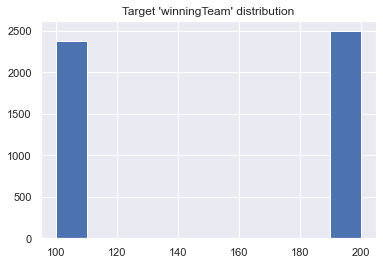

In [9]:
# Graphing the Distribution
sns.set(font_scale = 1)
df.winningTeam.hist()
plt.title("Target 'winningTeam' distribution")
plt.show()

### Acquire takeaway

    Summoner names were webscraped from popular sites:
    
        https://na.op.gg/ranking/ladder/
        https://www.trackingthepros.com/players/na/
        
    Only selected the data from the top 3000 players in the North American server.
    
    Includes only skill levels of: 
    
        - masters
        - grandmasters
        - challenger
        - professionals
    
    Riot api was used to get puuid numbers from players.
    
    Puuid numbers are used to get match lists from the players match histories.
    
    The match lists of games that were longer than 10 min were used to get json files that were prepared into the nice tidy dataframe.

# Prepare

#### Dropped Columns

    The following columns got dropped because it didn't offer any value:
    
        - killsplayer_0
        - Unnamed: 0 

    killsplayer_0 represents how many kills were made by game objects, not players, and contains several null values.  Unnamed: 0 was just a column that was created when the dataframes were merged.
    
        

#### Handle Nulls
    
    Filled in all missing values with a 0. 
    
    Nans were given when a player didn't have any value for any particular feature.  

#### Convert Data Types

    No data types were converted

#### Rename

    Changed the following columns names to something with more readability: 
    
    BlueTeam
    
        - deathsplayer_100 -> BlueTeamDeaths
        
        - goldPerSecond_100 -> BlueTeamGoldPerSecond
        
        - jungleMinionsKilled_100 -> BlueTeamJungleMinionsKilled
        
        - killsplayer_100 -> BlueTeamKills
        
        - level_100 -> BlueTeamLevel
        
        - magicDamageDoneToChampions100 -> BlueTeamMagicDamageDoneToChampions
        
        - minionsKilled_100 -> BlueTeamMinionsKilled
        
        - physicalDamageDoneToChampions_100 -> BlueTeamPhysicalDamageDoneToChampions
        
        - timeEnemySpentControlled_100 -> BlueTeamTimeEnemySpentControlled
        
        - totalDamageDoneToChampions_100 -> BlueTeamTotalDamageDoneToChampions
        
        - totalGold_100 -> BlueTeamTotalGold
        
        - trueDamageDoneToChampions_100 -> BlueTeamTrueDamageDoneToChampions
        
        - ward_player_100 -> BlueTeamWard_player
        
        - assistsplayer_100 -> BlueTeamAssistsplayer
        
        - xp_100 -> BlueTeamXP
        
        
    RedTeam
    
        - deathsplayer_200 -> RedTeamDeaths
        
        - goldPerSecond_200 -> RedTeamGoldPerSecond
        
        - jungleMinionsKilled_200 -> RedTeamJungleMinionsKilled
        
        - killsplayer_200 -> RedTeamKills
        
        - level_200 -> RedTeamLevel
        
        - magicDamageDoneToChampions200 -> RedTeamMagicDamageDoneToChampions
        
        - minionsKilled_200 -> RedTeamMinionsKilled
        
        - physicalDamageDoneToChampions_200 -> RedTeamPhysicalDamageDoneToChampions
        
        - timeEnemySpentControlled_200 -> RedTeamTimeEnemySpentControlled
        
        - totalDamageDoneToChampions_200 -> RedTeamTotalDamageDoneToChampions
        
        - totalGold_200 -> RedTeamTotalGold
        
        - trueDamageDoneToChampions_200 -> RedTeamTrueDamageDoneToChampions
        
        - ward_player_200 -> RedTeamWard_player
        
        - assistsplayer_200 -> RedTeamAssistsplayer
        
        - xp_200 -> RedTeamXP

#### Engineered Features

    - BlueTeamTotalGoldDifference = BlueTeamTotalGold - RedTeamTotalGold
    
    - RedTeamTotalGoldDifference = RedTeamTotalGold - BlueTeamTotalGold
    
    - BlueTeamMVPKills = Blue teams highest individual kill count 
    
    - RedTeamMVPKills = Red teams highest individual kill count 

#### Removed Outliers
    
    No outliers were removed.

#### Scaling
    No scaling was done.

#### Encode

    Created dummy columns for:
    
        - gameVersion
        

#### Split

    Split data into three data frames:
    
        - train
        - test
        
    Used a random_state of 123

### Prepare Takeaway
    
    - All features and observations have no null or empty values.
    
    - Most of the data was already prepped the way we needed it because we pulled the data off of JSON files ourselves.

# Exploration

In [10]:
# Using wrangle_explore because the values wont be scaled or encoded
train, test = prepare(df)

### Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'Blue Team'.

Text(0.5, 1.0, 'Feautures Correlating with winningTeam')

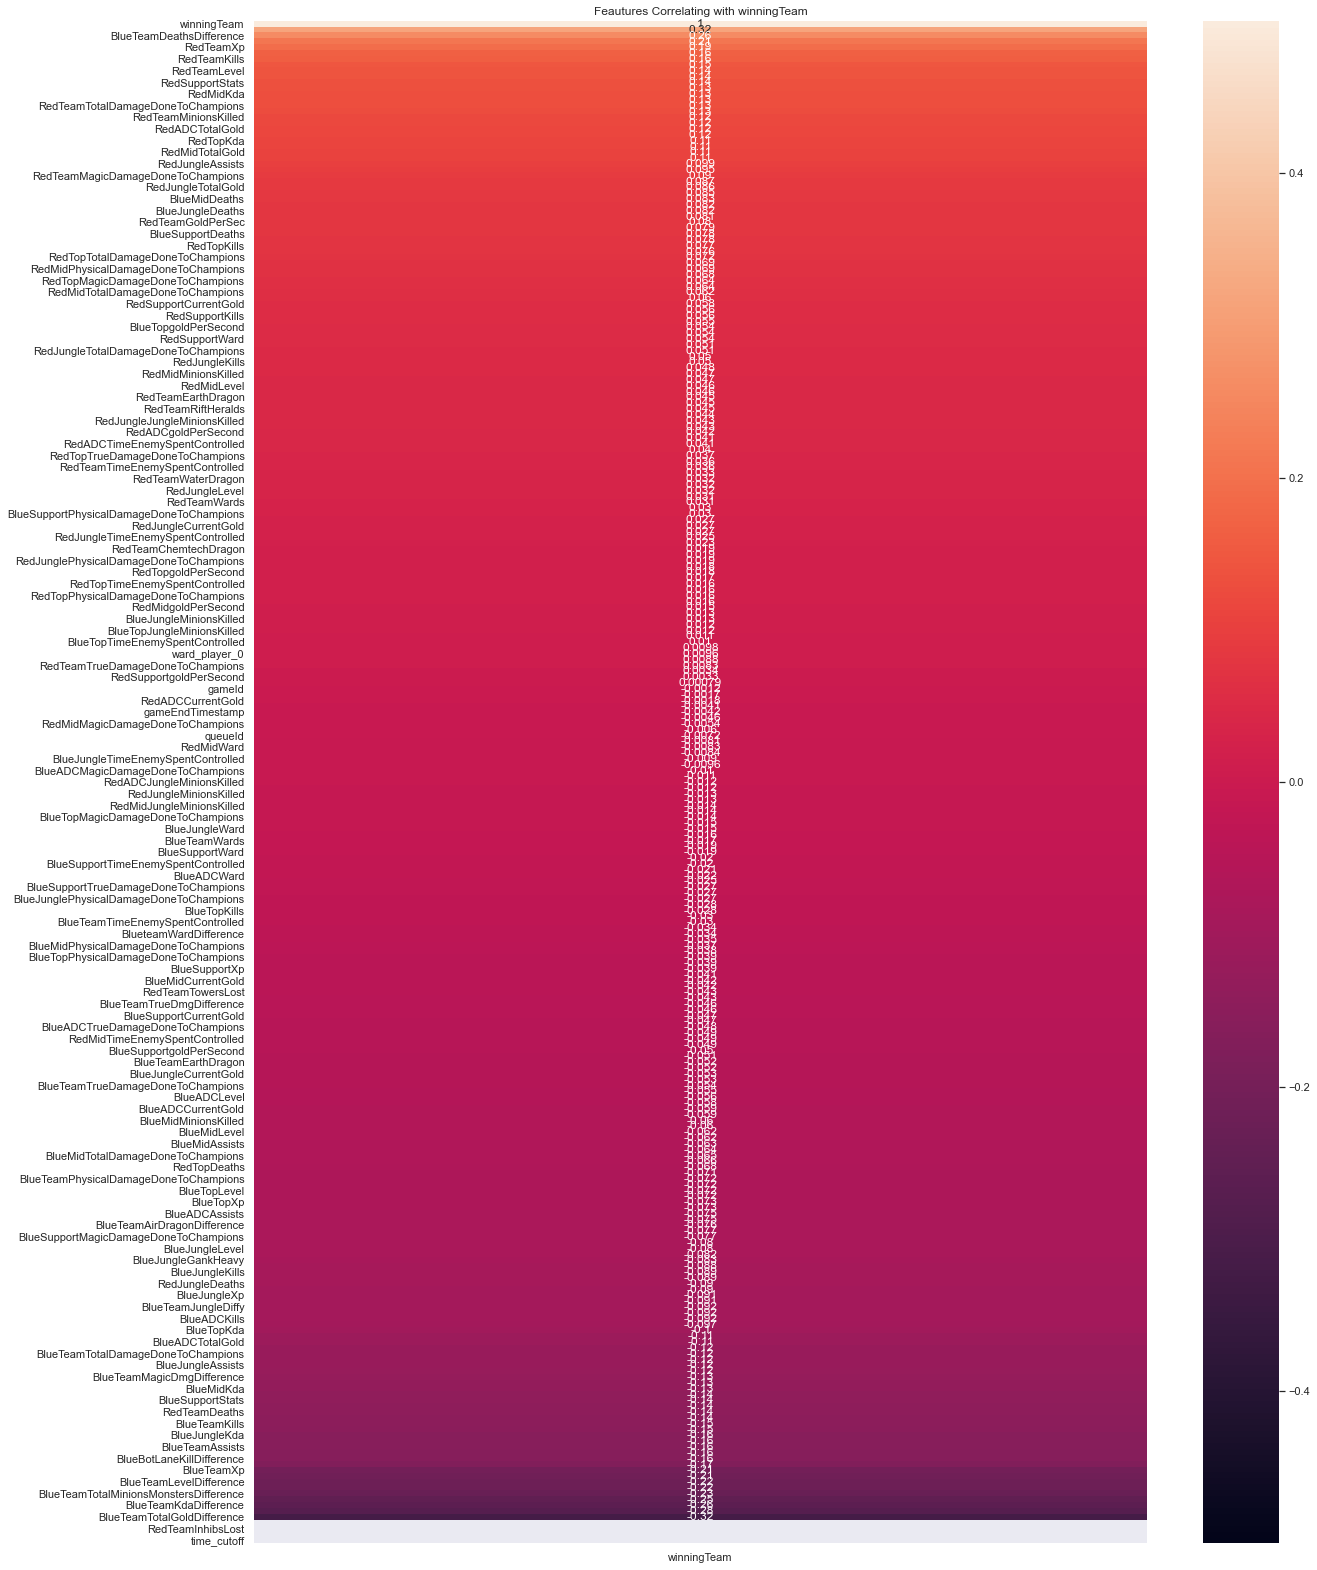

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,28))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-.50, vmax=.50, annot=True)
heatmap.set_title('Feautures Correlating with winningTeam')

# Exploration

- Is there a correlation between Blue team's gold and team levels that could effect outcome of the game
- Is there a correlation between Blue Team Physical Damage Difference and Blue Team Kda Difference
- Is there a correlation between blue team's minion kill difference that will effect the outcome of the game

## What key drivers effect the outcome of winning a match?

### Question 1
- Is there a correlation between Blue team's gold and team levels that could effect outcome of the game

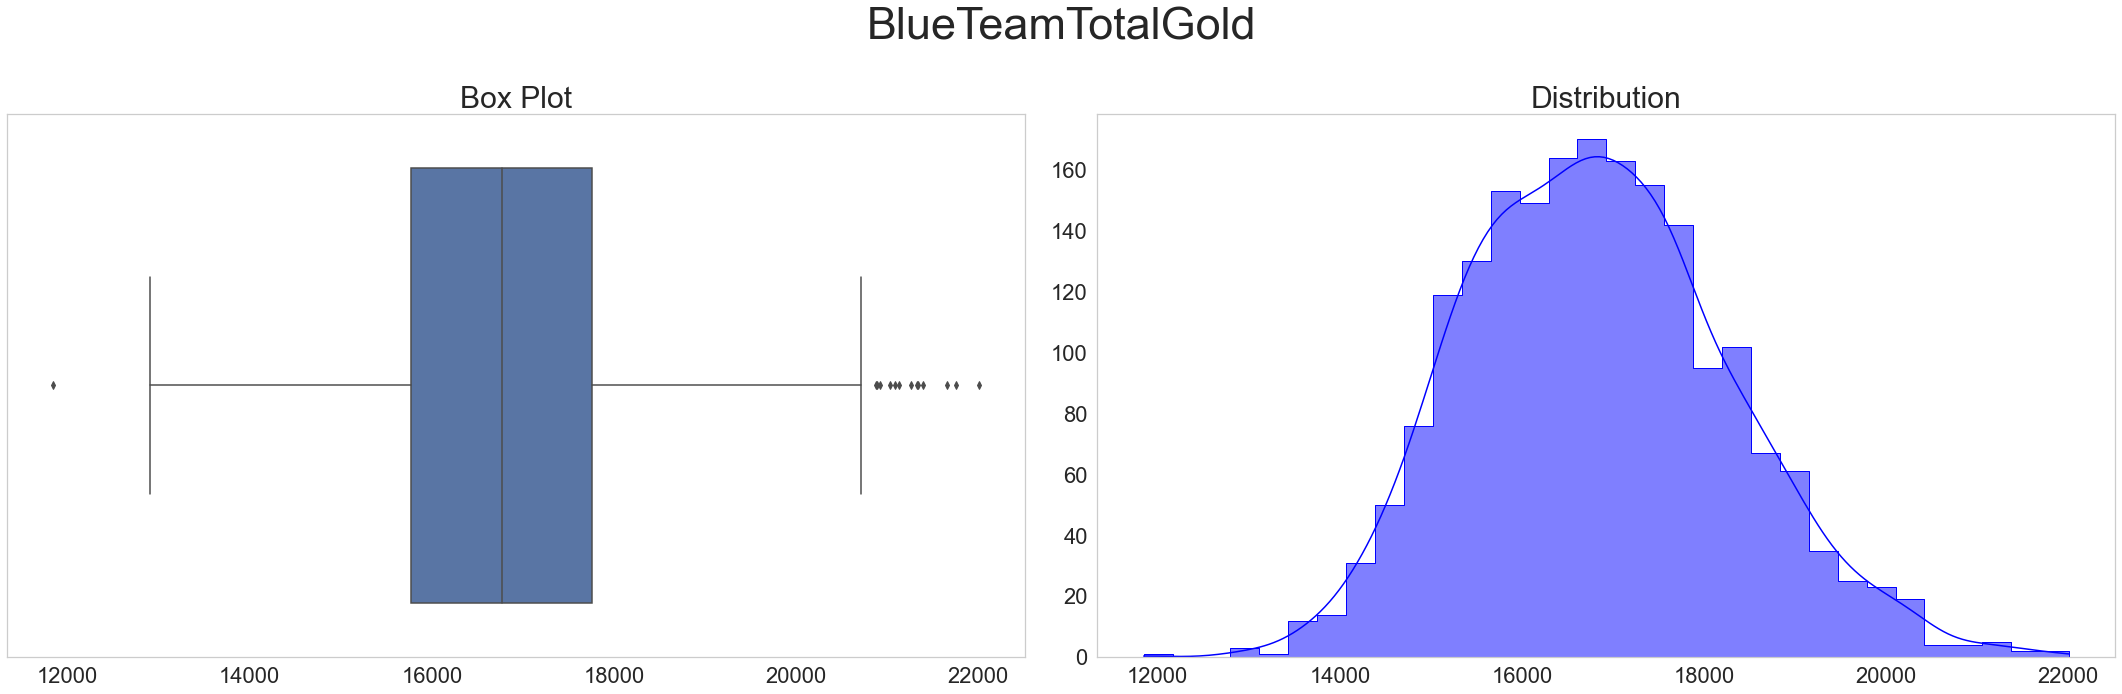

Summary Statistics for BlueTeamTotalGold
count     1977.000000
mean     16834.174507
std       1448.068867
min      11846.000000
25%      15770.000000
50%      16775.000000
75%      17763.000000
max      22007.000000
Name: BlueTeamTotalGold, dtype: float64


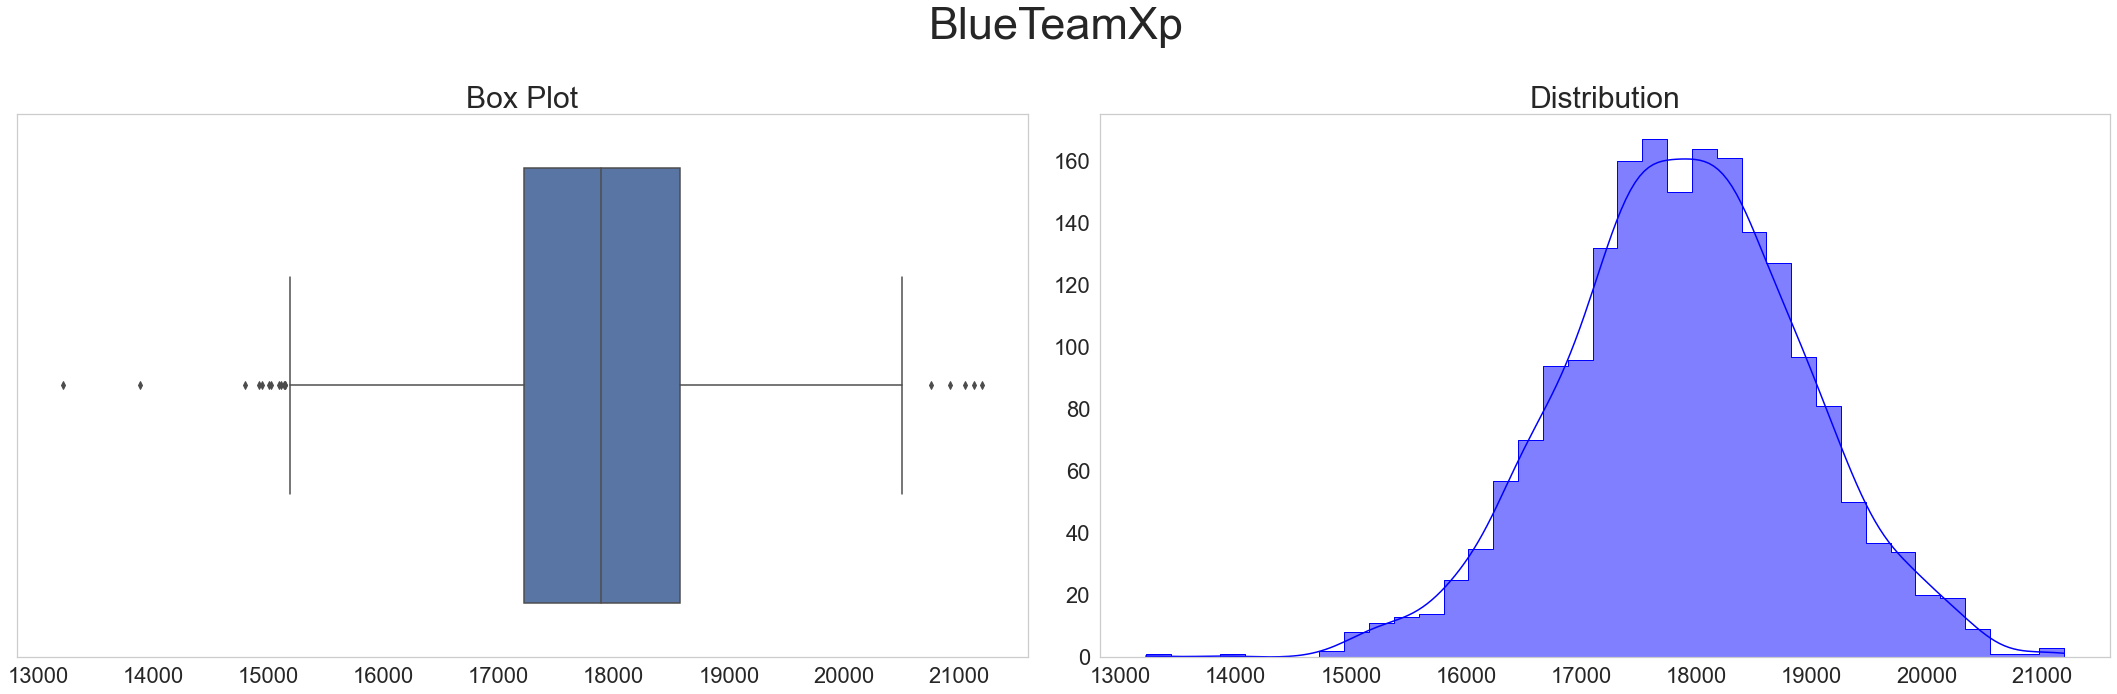

Summary Statistics for BlueTeamXp
count     1977.000000
mean     17885.055640
std       1041.245339
min      13219.000000
25%      17218.000000
50%      17891.000000
75%      18576.000000
max      21196.000000
Name: BlueTeamXp, dtype: float64


In [12]:
# univariate study
univariate_study = ['BlueTeamTotalGold','BlueTeamXp']

for i in univariate_study:
    explore.explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team had less then average gold and almost average levels at the 10 min mark

### Man Whitney U

In [13]:
# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamTotalGoldDifference, train.BlueTeamXp)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")

587.35260054571 4.336088711261508e-121
blue and red populations do not have equal variances


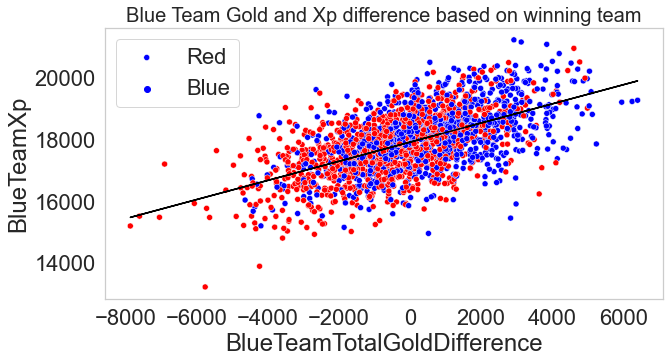

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamTotalGoldDifference',y='BlueTeamXp',data=train,hue='winningTeam', palette=['blue','red'])
x = train.BlueTeamTotalGoldDifference
y = train.BlueTeamXp
classes = ['Red', 'Blue']
plt.legend(labels=classes)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.title('Blue Team Gold and Xp difference based on winning team', fontsize = 20)
plt.show()

## Hypothesis

### $H_0$: Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant

### $H_a$: Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant

In [15]:
import scipy.stats as stats
# hypothesis testing

null_hypothesis = "Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant"
alternative_hypothesis = "Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant"
a = 0.05 #a for alpha 

big_loss = train[train.BlueTeamTotalGoldDifference > 40]
little_loss = train[train.BlueTeamXp >= 17_000]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

6.698777107612587e-07
Reject null hypothesis that: Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant
There is evidence to suggest: Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant


### Hypothesis Results:
- There is evidence to suggest Blue team's gold difference over 40 and blue team's Xp over 17k is significant with a p value close to zero

### Question 2
- Is there a correlation between 'Blue Team Physical Damage Difference and Blue Team Kda Difference

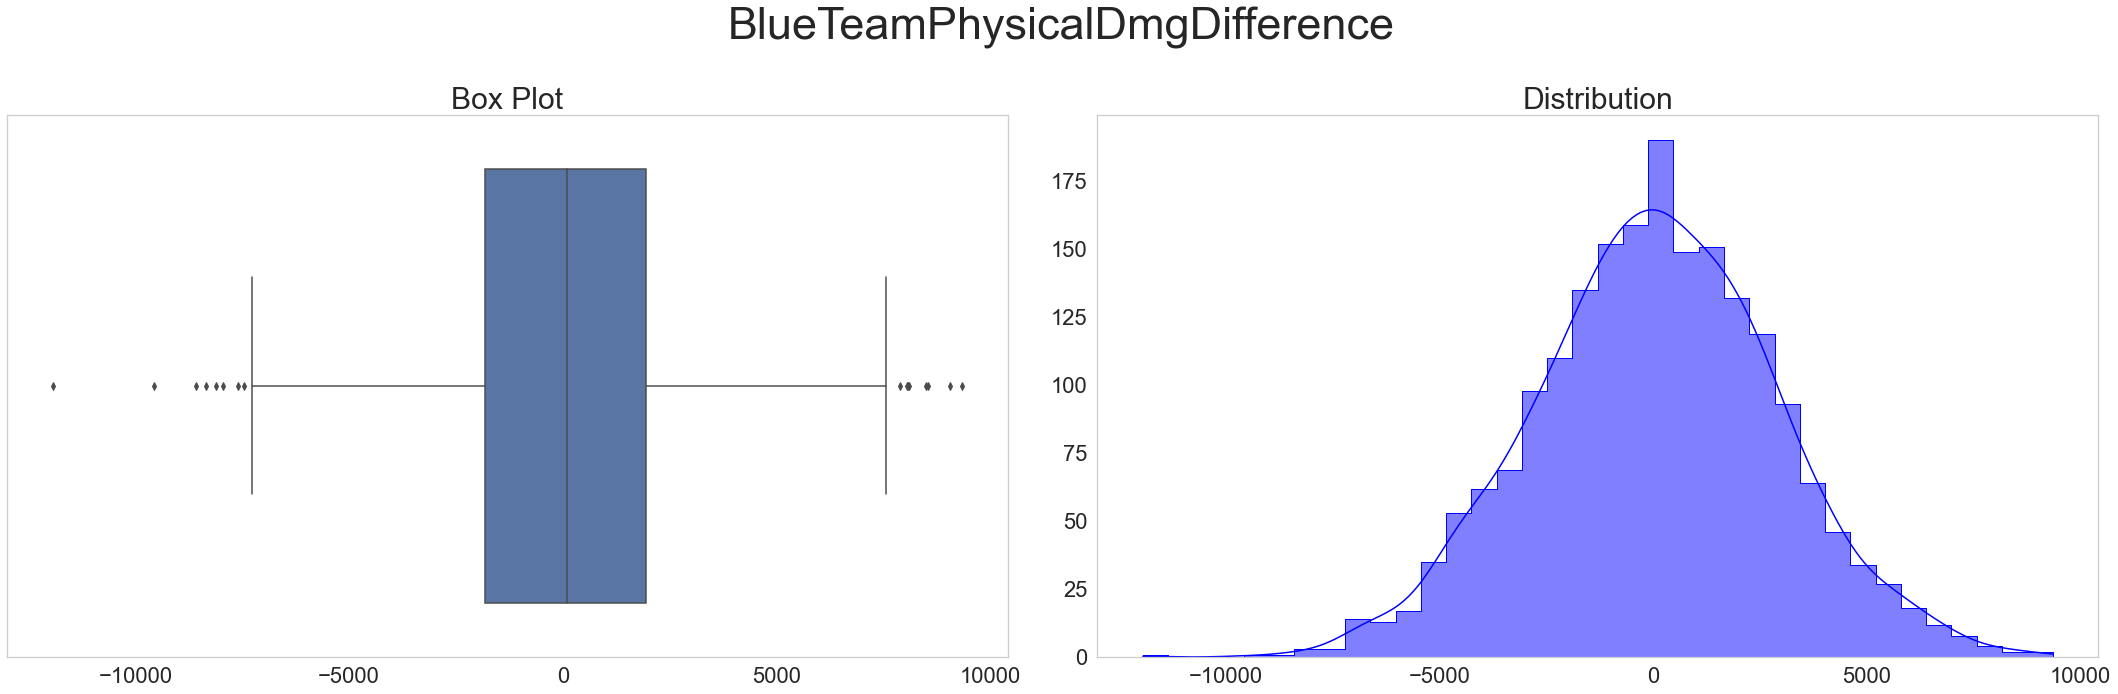

Summary Statistics for BlueTeamPhysicalDmgDifference
count     1977.000000
mean        40.133536
std       2851.968288
min     -11936.000000
25%      -1817.000000
50%         88.000000
75%       1936.000000
max       9344.000000
Name: BlueTeamPhysicalDmgDifference, dtype: float64


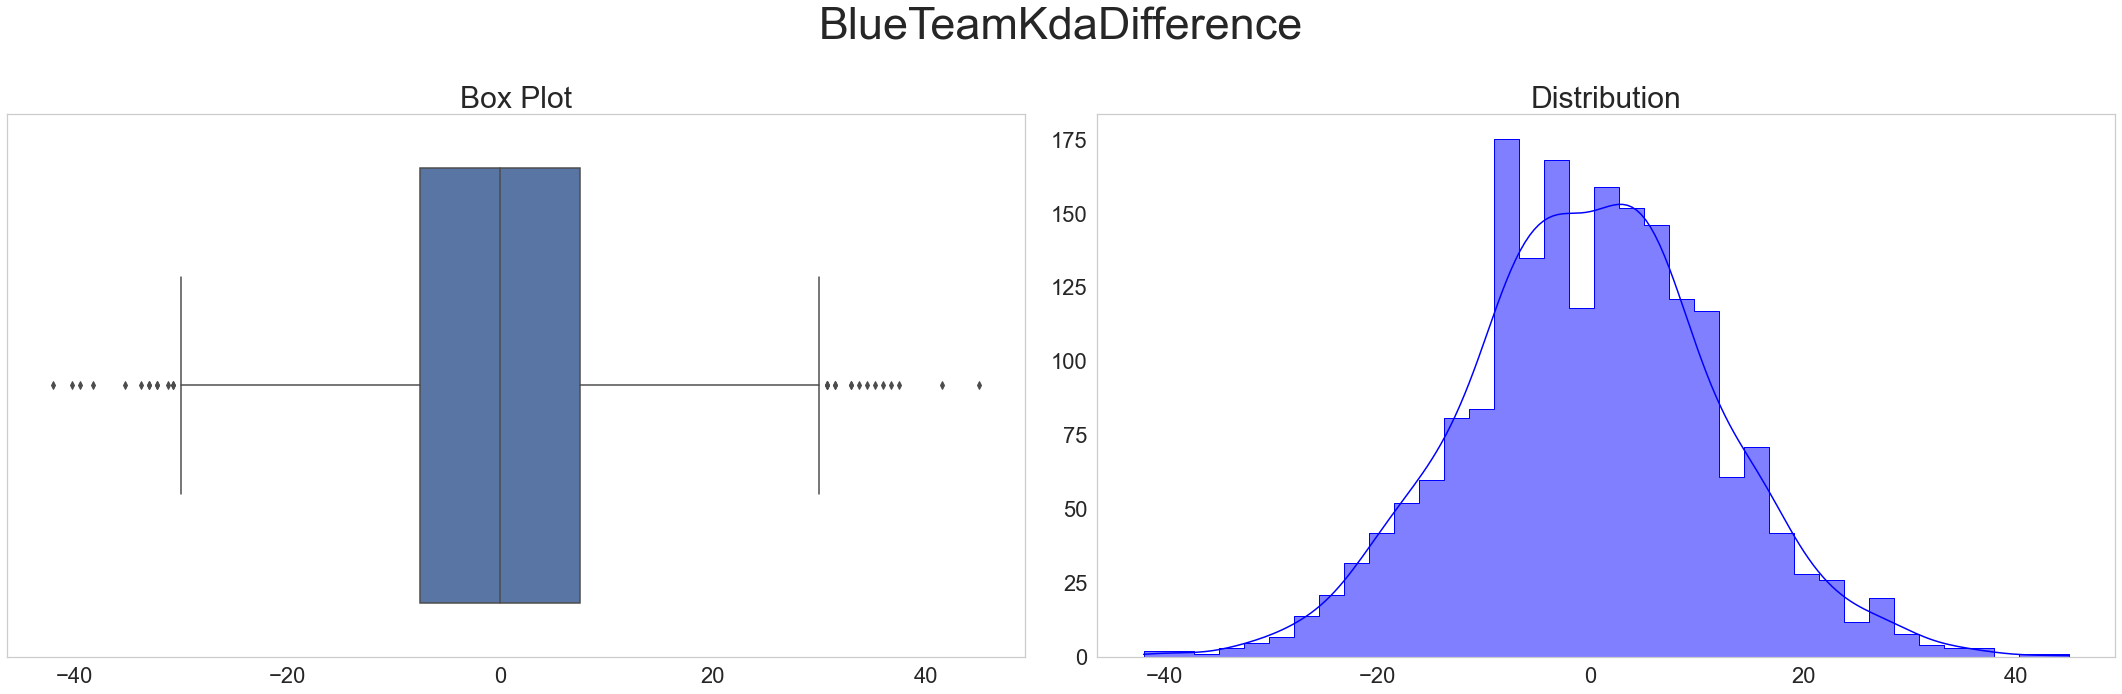

Summary Statistics for BlueTeamKdaDifference
count    1977.000000
mean       -0.059433
std        12.001959
min       -42.000000
25%        -7.500000
50%         0.000000
75%         7.500000
max        45.000000
Name: BlueTeamKdaDifference, dtype: float64


In [16]:
# univariate study
univariate_study = ['BlueTeamPhysicalDmgDifference','BlueTeamKdaDifference']

for i in univariate_study:
    explore.explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

### Takeaways
- Blue teams physical damage difference was 85 and the kda was above 0

### Man Whitney U

In [17]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamPhysicalDmgDifference, train.BlueTeamKdaDifference)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


3279.257693466784 0.0
blue and red populations do not have equal variances


## Hypothesis 

### $H_0$: Blue team's physical damage difference over -85 and blue team's kda difference over 1  is not significant

### $H_a$: Blue team's physical damage difference over -85 and blue team's kda difference over 1  is significant

In [36]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Blue team's physical damage difference over -85 and blue team's kda difference over 1  is not significant"
alternative_hypothesis = "Blue team's physical damage difference over -85 and blue team's kda difference over 1 is significant"
a = 0.05 #a for alpha 

big_xp = train[train.BlueTeamPhysicalDmgDifference > -85]
little_xp = train[train.BlueTeamKdaDifference >= 1]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.016927591851571798
Reject null hypothesis that: Blue team's physical damage difference over -85 and blue team's kda difference over 1  is not significant
There is evidence to suggest: Blue team's physical damage difference over -85 and blue team's kda difference over 1 is significant


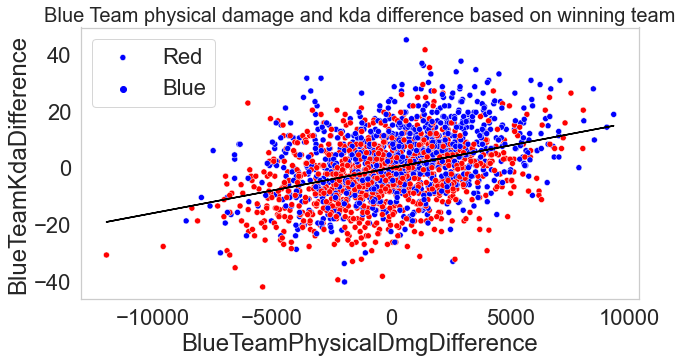

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamPhysicalDmgDifference',y='BlueTeamKdaDifference',data=train,hue='winningTeam', palette=['blue','red'])
x = train.BlueTeamPhysicalDmgDifference
y = train.BlueTeamKdaDifference
classes = ['Red', 'Blue']
plt.legend(labels=classes)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.title('Blue Team physical damage and kda difference based on winning team', fontsize = 20)
plt.show()

### Question 3
- Is there a correlation between Blue team ward difference and blue team's minion kill difference that will effect the outcome of the game

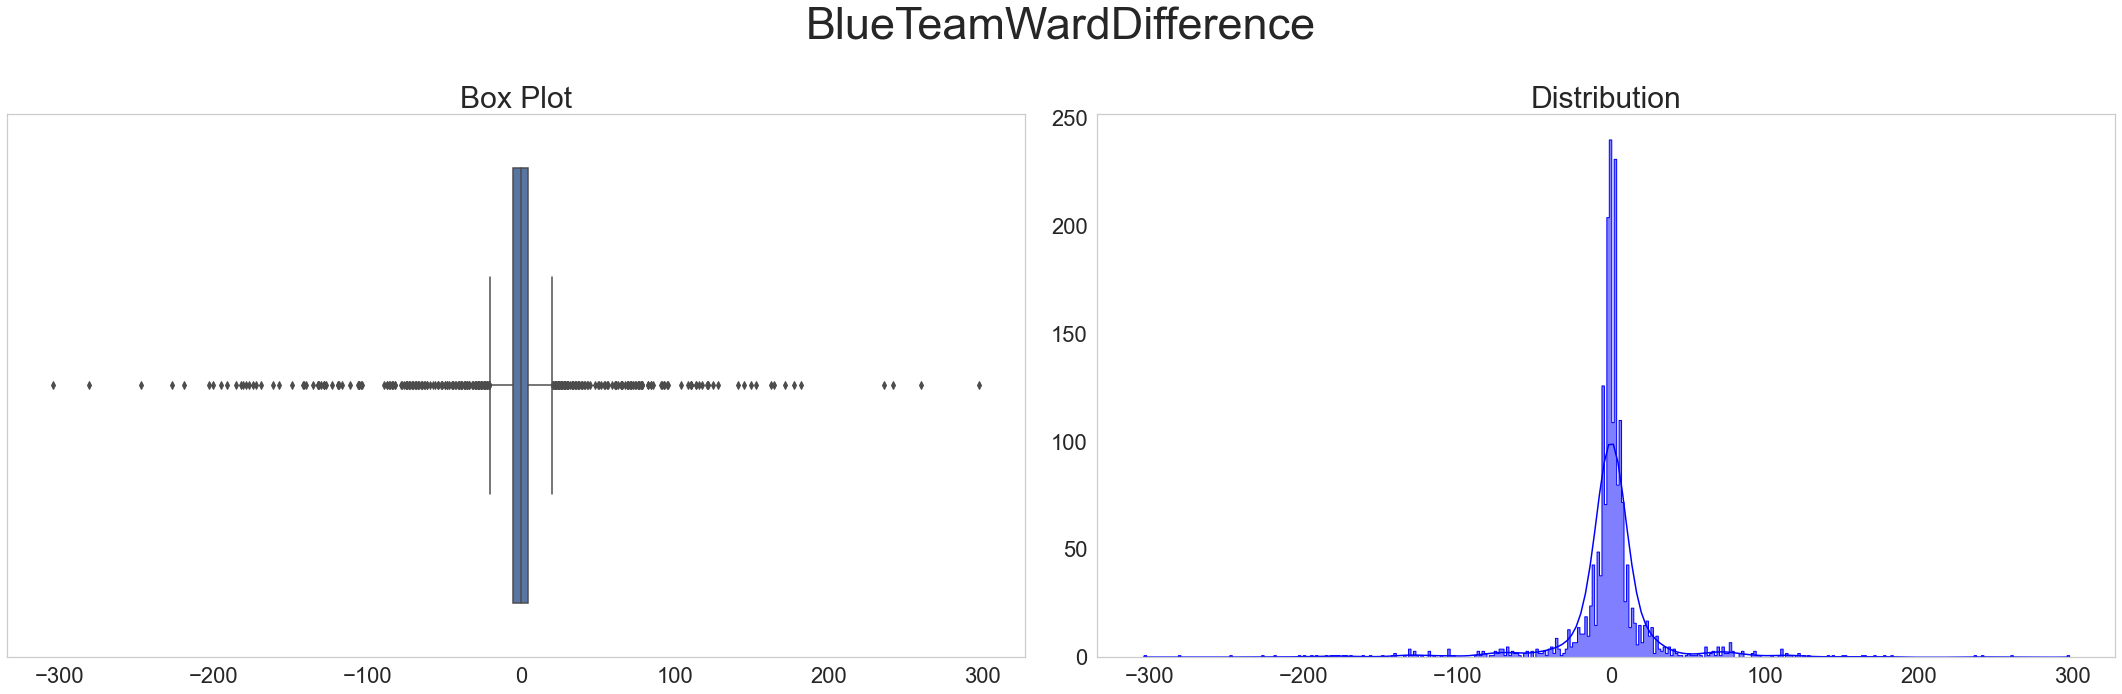

Summary Statistics for BlueTeamWardDifference
count    1977.000000
mean       -1.039960
std        36.921707
min      -304.000000
25%        -5.000000
50%         0.000000
75%         5.000000
max       298.000000
Name: BlueTeamWardDifference, dtype: float64


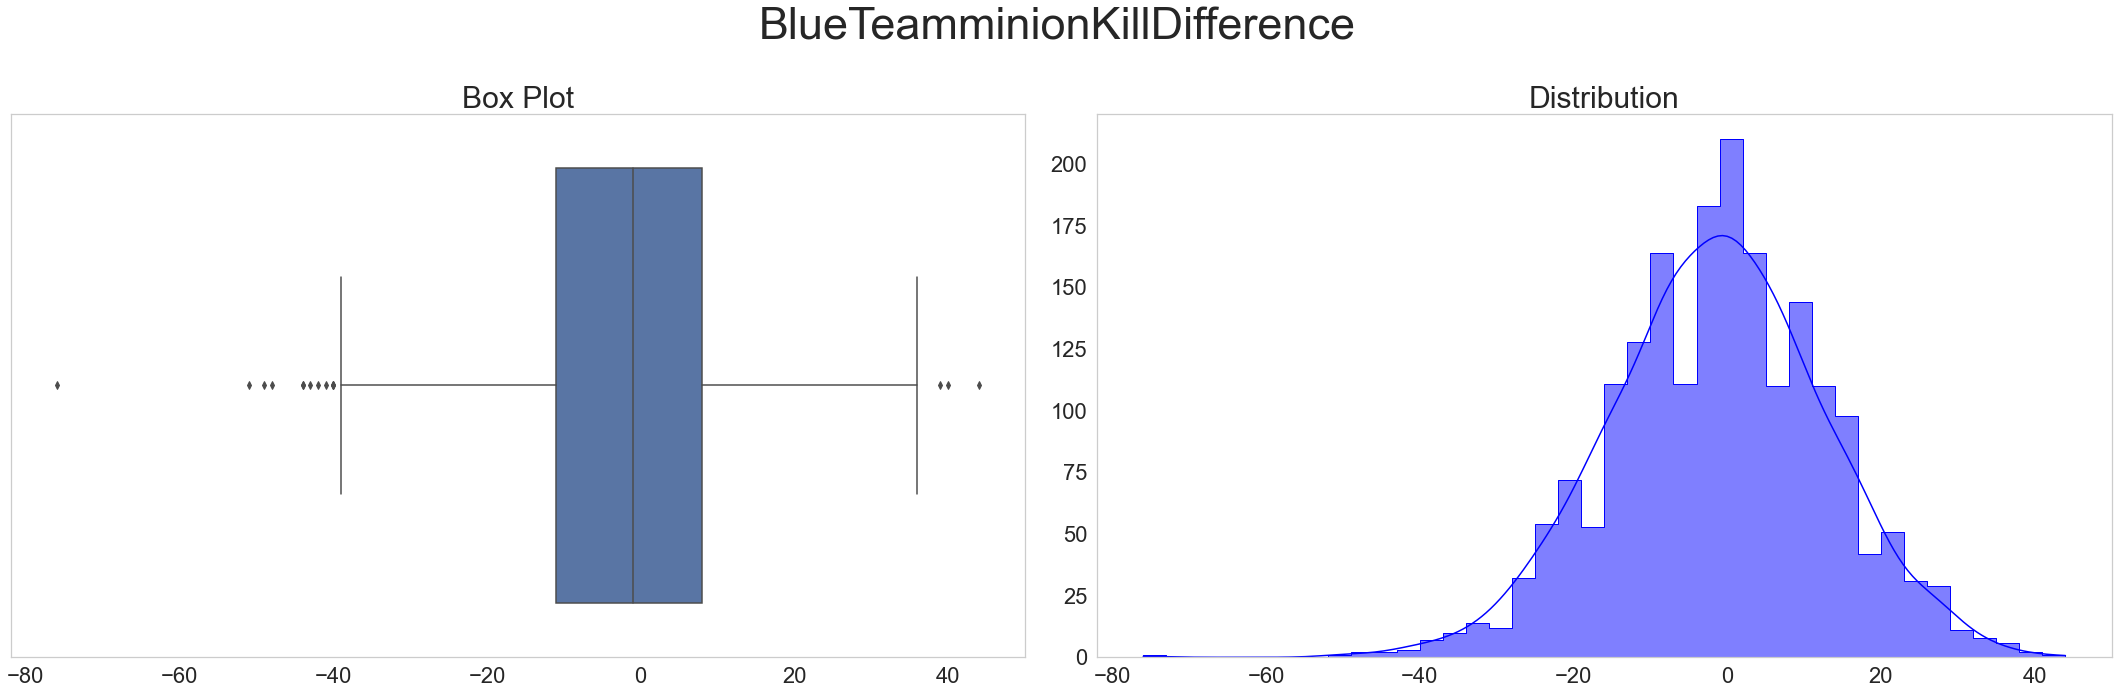

Summary Statistics for BlueTeamminionKillDifference
count    1977.000000
mean       -1.455741
std        14.081752
min       -76.000000
25%       -11.000000
50%        -1.000000
75%         8.000000
max        44.000000
Name: BlueTeamminionKillDifference, dtype: float64


In [38]:
# univariate study
univariate_study = ['BlueTeamWardDifference',
       'BlueTeamminionKillDifference']

for i in univariate_study:
    explore.explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

### Man Whitney U

In [39]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamWardDifference, train.BlueTeamminionKillDifference)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


47.09883752725246 7.803490776020695e-12
blue and red populations do not have equal variances


## Hypothesis 

## $H_0$: Blue team's  minion kills difference over 0  is not significant

## $H_a$: Blue team's  minion kills difference over 0  is  significant

In [40]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Blue team's  minion kills difference over 0  is not significant"
alternative_hypothesis = "Blue team's  minion kills difference over 0  is  significant"
a = 0.05 #a for alpha 

big_xp = train[train.BlueTeamminionKillDifference > 0]
little_xp = train[train.BlueTeamminionKillDifference <= 0]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

4.948857226417019e-07
Reject null hypothesis that: Blue team's  minion kills difference over 0  is not significant
There is evidence to suggest: Blue team's  minion kills difference over 0  is  significant


<Figure size 720x360 with 0 Axes>

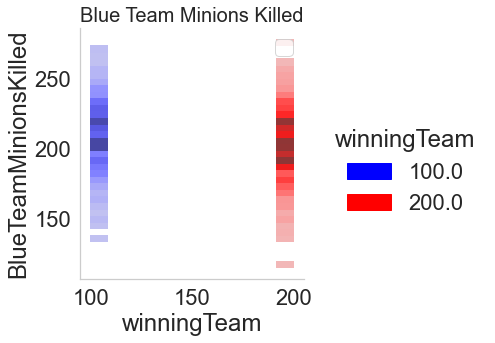

In [41]:
plt.show()
plt.figure(figsize=(10,5))
sns.displot(x='winningTeam',y='BlueTeamMinionsKilled',data=train,hue='winningTeam', palette=['blue','red'])
x = train.winningTeam
y = train.BlueTeamMinionsKilled
classes = ['Blue', 'Red']
plt.legend(labels=classes)
plt.title('Blue Team Minions Killed', fontsize = 20)
plt.show()

### Hypothesis Results:
- killing minions was significant in the early game with a p value less than alpha

### Takeaways
- There is evidence to suggest Blue team's gold difference over 40 and blue team's Xp over 17k is significant with a  p value close to zero

- Blue team's physical damage difference over 0 and blue team's kda difference over 0 is significant with a p value of .06

- Blue team's killing minions was significant in the early game with a p value less than alpha

# Exploration Take Away

    - Features I am predicting to do reasonably well in my model.  I will try them in the modeling stage and document the process.
    
        'Blue team gold difference'
        'Blue team minions killed'
        'Blue team physical damage'
        'Blue team kda'

# Modeling

    - Prepare the data for modeling
    - Split the data into X and y groups
    - Create a baseline
    - Build RandomForestClassifier models
    - Evaluate the best one to use on our the test dataset.

In [24]:
#Load and prepare the data for modeling
#train, test = prepare(acquire())

In [25]:
#Split the data into X and y groups
X_train, y_train = train.drop(columns = ['winningTeam']), train.winningTeam
X_test, y_test = test.drop(columns = ['winningTeam']), test.winningTeam

In [26]:
#Select only the blue team features that indicate differences
cols_to_keep = X_train.columns[(X_train.columns.str.contains('Blue')) & (X_train.columns.str.contains('Difference')) & (X_train.columns.str.contains('Team'))]
cols_to_keep

Index(['BlueTeamTotalGoldDifference', 'BlueTeamLevelDifference',
       'BlueTeamXpDifference', 'BlueTeamWardDifference',
       'BlueTeamminionKillDifference', 'BlueTeamDeathsDifference',
       'BlueTeamMagicDmgDifference', 'BlueTeamPhysicalDmgDifference',
       'BlueTeamTrueDmgDifference', 'BlueTeamTotalDmgDifference',
       'BlueTeamTotalMinionsMonstersDifference', 'BlueTeamTimeCCingDifference',
       'BlueTeamWaterDragonDifference', 'BlueTeamAirDragonDifference',
       'BlueTeamChemtechDragonDifference', 'BlueTeamFireDragonDifference',
       'BlueTeamHextechDragonDifference', 'BlueTeamEarthDragonDifference',
       'BlueTeamKdaDifference'],
      dtype='object')

In [27]:
#Only use the above features in the train and test data sets
X_train = X_train.loc[:, cols_to_keep]
X_test = X_test.loc[:, cols_to_keep]

In [28]:
#What are the shapes of our train and test data sets?
X_train.shape, X_test.shape

((1977, 19), (491, 19))

### Create a Baseline

    Since this is a classification problem, we will set the baseline to whichever team has the most wins in our training set.

In [29]:
# Which team has the most wins? Team 200.0 (Red Team)
y_train.value_counts()

200.0    1027
100.0     950
Name: winningTeam, dtype: int64

In [30]:
# The following function call creates the baseline, returns the model, and prints the accuracy
baseline_model = model.baseline_acc(X_train, y_train)

Baseline accuracy score is: 51.947%


### Random Forest Classifier

    To use the function we wrote, you must first create a dictionary keyed with hyperparameters and a range of values for each. It will be used to find and return an optimized Random Forest Classifier model.

In [31]:
#Create the dictionary of hyperparameters we want to optimize across
param_dict = {
    'max_depth': range(1, 16),
    'min_samples_leaf': range(1, 16)
}

In [32]:
#The following function call will find and return an optimized Random Forest Classifier
#and print out that model's mean cross-validated accuracy and its hyperparameters.
best_model = model.get_random_forest_models(X_train, y_train, param_dict)

KeyboardInterrupt: 

__Best Model Takeaways__

    - Random Forest Classifier
    - Mean Cross-Validated Accuracy: 64.49%
    - Outperformed Baseline by 12%
    - Max Depth: 9
    - Minimum Samples Per Leaf: 2

__Top 10 Features__

In [ ]:
best_features = pd.DataFrame(best_model.feature_importances_, X_train.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

# Evaluation

    - Refit on train data before using it on the test data. 
    
    - This needs to be done because cross-validation fits models on a small subset of the given data which means that our best model has only been trained on a fraction of the actual training data set.

__Fit Best Model on All Train Data__

In [ ]:
#The following line of code will fit our best model to all of the training data
best_model.fit(X_train, y_train)

__Evaluate On Test__

In [ ]:
#The following code will score our best model on the unseen test data
best_model.score(X_test, y_test)

__Get Predictions__

In [ ]:
test_preds = best_model.predict(X_test)

__Classification Report__

In [ ]:
#The following prints a report containing information like precision, recall, and f1-score
print(classification_report(y_test, test_preds, target_names=['Blue Team', 'Red Team']))

### Conclusion

    Our random forest classifier model mean cross-validated accuracy was roughly 64% beating our baseline accuracy by 12%.
    
    Evaluating our best model on the test data set resulted in an accuracy of about 61%.
    
    Our model confirmed that our original hypothesis of 'TeamWards' being the biggest driver of win rates was incorrect.  Our model's feature importance concluded that 'BlueTeamTotalGoldDifference' was the biggest driver in predicting win rates. 
    
    Our model identified the most important features as:
        
        'BlueTeamTotalGoldDifference'
        'BlueTeamXpDifference'
        'BlueTeamTotalDmgDifference'
        'BlueTeamTotalMinionsMonstersDifference'
        'BlueTeamKdaDifference'
        
    If we had more time we would have liked to:
    
        - run our model on non-pro games & see if 'BlueTeamTotalGoldDifference' is still the biggest driver for predicting win rates
        - dive deeper into what are the drivers for gaining towers
        - engineer more features
        - predict a winner at a much earlier time than 10 min into a game
        

### Recommendations

    The data suggests:  
    
    - If you are a coach, revolving your team stragety around objectives can lead to more wins. 
    
    - If you are player, encouraging memebers of ones team to work around objectives can lead to more wins. 

### Key Takeaways

    We used event data from the Riot API to calcuate what the value of each oberservation was at the 10 min marker.
    
    The only 'gameType' used was "classic".  Which means all the data is from the most popular game mode and on the same map.

    Games were pulled from various game patches to include:

        '11.10.376.4811'
        '11.11.377.6311'
        '11.12.379.4946'
        '11.13.382.1241'
        '11.14.384.6677'
        '11.14.385.9967'
        '11.15.388.2387'
        '11.15.389.2308'
        '11.16.390.1945'
        '11.17.393.607'
        '11.17.394.4489'
        '11.18.395.7538'
        '11.19.398.2521'
        '11.19.398.9466'
        '11.20.400.7328'
        '11.21.403.3002'
        '11.22.406.3587'
        '11.23.409.111'

# Thank you